In [1]:
# Mounting files from gdrive
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'termios'

In [2]:
# Installing fscparser to parse fcs files

!pip install fcsparser

In [3]:
!unzip FCM\ Data\ for\ Kartik.zip

unzip:  cannot find or open FCM Data for Kartik.zip, FCM Data for Kartik.zip.zip or FCM Data for Kartik.zip.ZIP.


In [4]:
cd gdrive/MyDrive/FCM\ Data\ for\ Kartik

/content/gdrive/MyDrive/FCM Data for Kartik


## **Abbreviations for components of FCS filenames:**



> 




*   C: Combination of Spectinomycin and Tetracycline antibiotics
*   S: Spectinomycin
*   T: Tetracycline
*   H: High Concentration
*   M: Medium Concentration
*   L: Low Concentration
*   NC: Negative control
*   PC: Positive Control
*   IND0: Inoculum on Day 0
*   D1, D2, D3, D4, D5: Days 1 to 5
*   1, 2, 3: Triplicates of each sample













In [1]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('./CHD1_1.fcs'))
dir = os.path.join(dir, 'FCM Data for Kartik')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [3]:
# Filtering FCS files with improper dimensions

checkDimensions(data, data[random.choice(list(data.keys()))].shape)

CMD4_1 (99906, 12)
SHD1_2 (100021, 12)
SHD2_3 (99670, 12)
TMD4_2 (100094, 12)


# Exploratory Data Analysis:


In [4]:
print('First five rows of sample fcs file -->')
random_sample = random.choice(list(data.keys()))
random_fcs_sample = data[random_sample]
random_fcs_sample.head()


First five rows of sample fcs file -->


,FSC-A,FSC-H,SSC-A,FITC-A,PE-A,PE-Cy5-A,PE-Cy7-A,APC-A,APC-Cy7-A,Pacific Blue-A,AmCyan-A,Time
0,312.800018,869.0,365.309998,81.180000,-71.279999,64.349998,-38.610001,-62.400002,-127.200005,49.050003,421.830017,53.299999
1,200.000000,823.0,400.950012,-46.529999,-208.889999,-8.910000,39.599998,-301.600006,-62.400002,75.209999,8.720000,53.299999
2,621.600037,767.0,961.290039,-159.389999,-492.029999,-55.440002,-28.710001,-11.200000,-154.400009,143.880005,71.940002,53.299999
3,421.600006,754.0,728.640015,-128.699997,348.480011,21.780001,14.850000,-340.800018,-46.400002,-34.880001,190.750000,53.299999
4,120.000000,879.0,452.429993,46.529999,0.000000,9.900000,113.849998,-309.600006,104.000000,-177.669998,-13.080000,53.299999


In [5]:
# Printing Channels present in each fcs file
channels

,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG
Channel Number,,,,,,
1,FSC-A,262144,32,"[0, 0]",478,1.0
2,FSC-H,262144,32,"[0, 0]",478,1.0
3,SSC-A,262144,32,"[0, 0]",324,1.0
4,FITC-A,262144,32,"[0, 0]",610,1.0
5,PE-A,262144,32,"[0, 0]",637,1.0
6,PE-Cy5-A,262144,32,"[0, 0]",606,1.0
7,PE-Cy7-A,262144,32,"[0, 0]",775,1.0
8,APC-A,262144,32,"[0, 0]",833,1.0
9,APC-Cy7-A,262144,32,"[0, 0]",715,1.0


In [6]:
# Checking for NaN values in each of the fcs files
sum([(sum(data[key].isnull().sum(),)) for key in data.keys()])

0

In [7]:
# Printing available features in each of the fcs file -->

features = random_fcs_sample.columns
print('Features in each fcs file : {}'.format(', '.join(features)))

Features in each fcs file : FSC-A, FSC-H, SSC-A, FITC-A, PE-A, PE-Cy5-A, PE-Cy7-A, APC-A, APC-Cy7-A, Pacific Blue-A, AmCyan-A, Time


<AxesSubplot:title={'center':'Features Standard Deviation for CLD4_1'}>

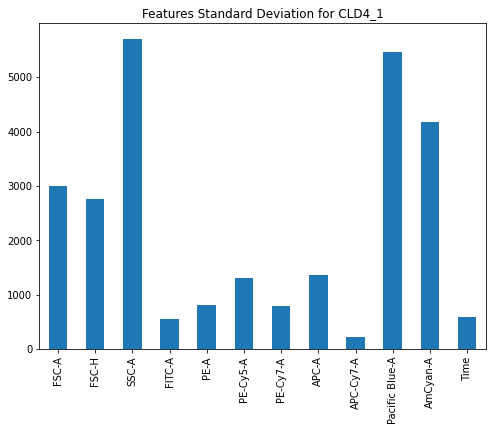

In [8]:
# Plotting and comparing the standard deviation of each of the input features:

random_fcs_sample[features].std().plot(kind='bar', figsize=(8,6), title=f"Features Standard Deviation for {random_sample}")

<AxesSubplot:>

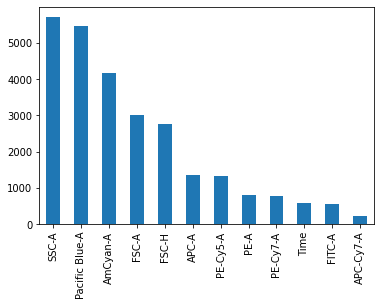

In [9]:
# Plotting the hist data in non-increasing order 

features_highest_variance = random_fcs_sample[features].std().sort_values(ascending=False)
features_highest_variance.plot(kind = 'bar')

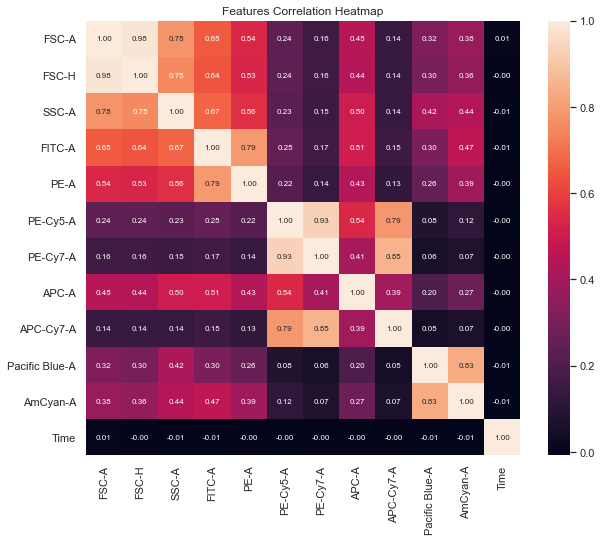

In [10]:
#Checking data colinearity via heatmap

cm = np.corrcoef(random_fcs_sample[features].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=features, xticklabels=features)
plt.title('Features Correlation Heatmap')
plt.show()

There is a very high correlation (> 0.6) between some features which could hurt the performance of some ML algorithms.

So, some of the above features will be target for removal in feature selection

Usually, we take only three features, which are FSC-A,  SSC-A and AmCyan-A

# Scatter/Dot Plots:

<AxesSubplot:xlabel='FSC-A', ylabel='SSC-A'>

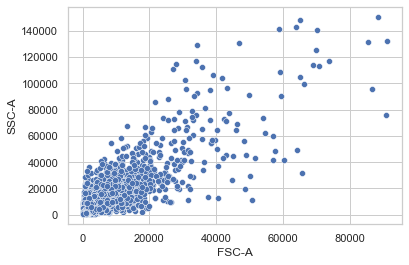

In [11]:
sns.set(style='whitegrid')
sns.scatterplot(x='FSC-A',y='SSC-A',data=random_fcs_sample)

<AxesSubplot:xlabel='FSC-H', ylabel='SSC-A'>

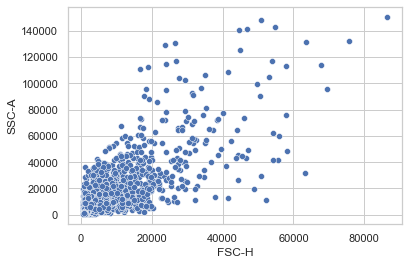

In [12]:
sns.set(style='whitegrid')
sns.scatterplot(x='FSC-H',y='SSC-A',data=random_fcs_sample)

# Histogram:

<AxesSubplot:xlabel='FITC-A', ylabel='Count'>

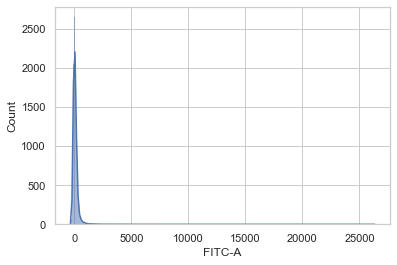

In [13]:
sns.histplot(random_fcs_sample['FITC-A'],kde='False')

<AxesSubplot:xlabel='PE-Cy5-A', ylabel='Count'>

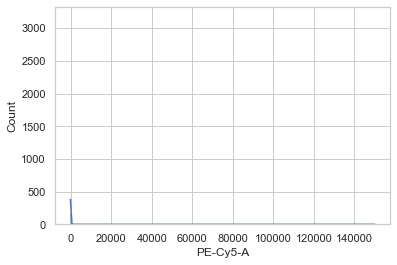

In [16]:
sns.histplot(random_fcs_sample['PE-Cy5-A'],kde='False')

<AxesSubplot:xlabel='PE-Cy7-A', ylabel='Count'>

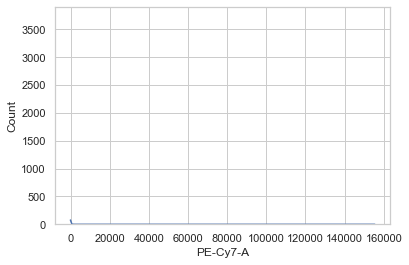

In [17]:
sns.histplot(random_fcs_sample['PE-Cy7-A'],kde='False')

# Contour Plots:

KeyboardInterrupt: 

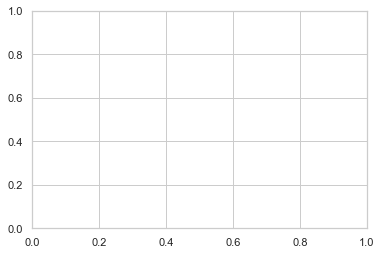

In [23]:
sns.kdeplot(x='FSC-A',y='SSC-A',data=random_fcs_sample)
plt.figure(figsize=(25,25))

In [ ]:
sns.kdeplot(x='FSC-A',y='AmCyan-A',data=random_fcs_sample)
plt.figure(figsize=(25,25))

In [26]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
  deta = {}
  for key in data.keys():
      deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
  return deta

triplicates_combined()

{'CHD1':              FSC-A   FSC-H        SSC-A      FITC-A        PE-A     PE-Cy5-A  \
 0        96.800003   995.0  1552.320068    2.970000   63.360001    70.290001   
 1       252.800003   707.0  1641.420044   87.120003   38.610001    59.400002   
 2       248.000000   791.0  1152.359985  -89.099998 -523.710022     1.980000   
 3       229.600006   827.0   708.840027   58.410000    1.980000    39.599998   
 4       289.600006   800.0  1036.530029   26.730000 -621.720032    53.459999   
 ...            ...     ...          ...         ...         ...          ...   
 99995   453.600006   691.0  1041.479980  133.649994  -63.360001   -45.540001   
 99996   358.399994   816.0  1626.570068  -47.520000  146.520004  1256.310059   
 99997  2806.400146  2898.0  1939.410034   -4.950000  331.649994   -33.660000   
 99998   798.400024  1623.0  1729.530029 -180.180008 -955.350037    10.890000   
 99999   368.000000   738.0  1073.160034   76.230003 -200.970001   -13.860001   
 
          PE-Cy7-A

In [12]:
data.keys()

dict_keys(['CHD1_1', 'CHD1_2', 'CHD1_3', 'CHD2_1', 'CHD2_2', 'CHD2_3', 'CHD3_1', 'CHD3_2', 'CHD3_3', 'CHD4_1', 'CHD4_2', 'CHD4_3', 'CHD5_1', 'CHD5_2', 'CHD5_3', 'CLD1_1', 'CLD1_2', 'CLD1_3', 'CLD2_1', 'CLD2_2', 'CLD2_3', 'CLD3_1', 'CLD3_2', 'CLD3_3', 'CLD4_1', 'CLD4_2', 'CLD4_3', 'CLD5_1', 'CLD5_2', 'CLD5_3', 'CMD1_1', 'CMD1_2', 'CMD1_3', 'CMD2_1', 'CMD2_2', 'CMD2_3', 'CMD3_1', 'CMD3_2', 'CMD3_3', 'CMD4_1', 'CMD4_2', 'CMD4_3', 'CMD5_1', 'CMD5_2', 'CMD5_3', 'IND0_1', 'IND0_2', 'IND0_3', 'NCD1_1', 'NCD1_2', 'NCD1_3', 'NCD2_1', 'NCD2_2', 'NCD2_3', 'NCD3_1', 'NCD3_2', 'NCD3_3', 'NCD4_1', 'NCD4_2', 'NCD4_3', 'NCD5_1', 'NCD5_2', 'NCD5_3', 'PCD1_1', 'PCD1_2', 'PCD1_3', 'PCD2_1', 'PCD2_2', 'PCD2_3', 'PCD3_1', 'PCD3_2', 'PCD3_3', 'PCD4_1', 'PCD4_2', 'PCD4_3', 'PCD5_1', 'PCD5_2', 'PCD5_3', 'SHD1_1', 'SHD1_2', 'SHD1_3', 'SHD2_1', 'SHD2_2', 'SHD2_3', 'SHD3_1', 'SHD3_2', 'SHD3_3', 'SHD4_1', 'SHD4_2', 'SHD4_3', 'SHD5_1', 'SHD5_2', 'SHD5_3', 'SLD1_1', 'SLD1_2', 'SLD1_3', 'SLD2_1', 'SLD2_2', 'SLD2_3',

In [11]:
# Data Cleaning 

Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['CHD1_1', 'CHD2_1', 'CHD3_1', 'CHD4_1', 'CHD5_1', 'CLD1_1', 'CLD2_1', 'CLD3_1', 'CLD4_1', 'CLD5_1', 'CMD1_1', 'CMD2_1', 'CMD3_1', 'CMD4_1', 'CMD5_1', 'IND0_1', 'NCD1_1', 'NCD2_1', 'NCD3_1', 'NCD4_1', 'NCD5_1', 'PCD1_1', 'PCD2_1', 'PCD3_1', 'PCD4_1', 'PCD5_1', 'SHD1_1', 'SHD2_1', 'SHD3_1', 'SHD4_1', 'SHD5_1', 'SLD1_1', 'SLD2_1', 'SLD3_1', 'SLD4_1', 'SLD5_1', 'SMD1_1', 'SMD2_1', 'SMD3_1', 'SMD4_1', 'SMD5_1', 'THD1_1', 'THD2_1', 'THD3_1', 'THD4_1', 'THD5_1', 'TLD1_1', 'TLD2_1', 'TLD3_1', 'TLD4_1', 'TLD5_1', 'TMD1_1', 'TMD2_1', 'TMD3_1', 'TMD4_1', 'TMD5_1'])

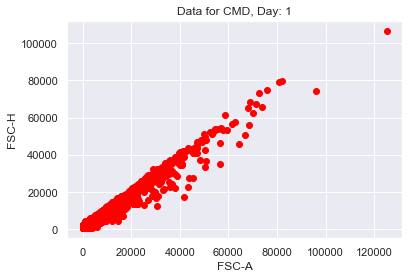

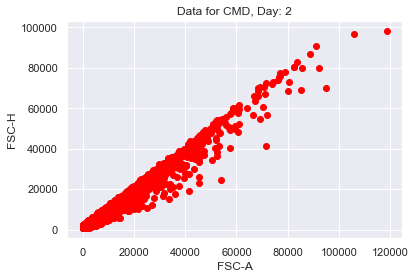

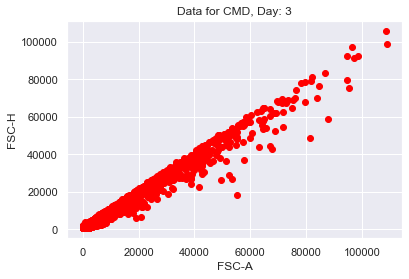

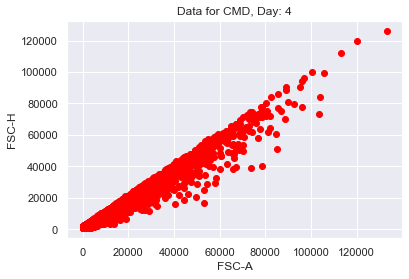

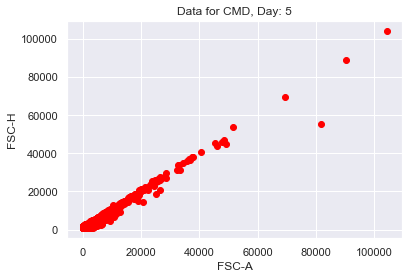

[None, None, None, None, None]

In [12]:
# Data Presentation

def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'CMD',i) for i in range(1,6)]

(1499906, 12)


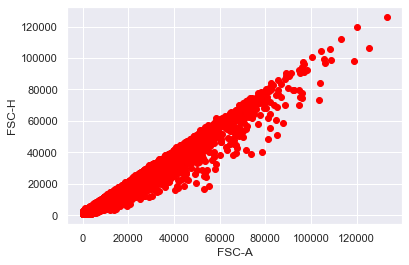

In [13]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'CMD')

### KMeans with feature vector of length 3

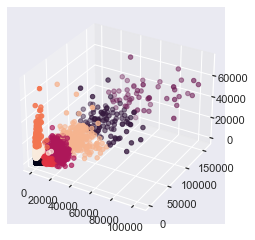

In [14]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()


## Intracluster Analysis

In [36]:
# K - means clustering with 3000 feature vector for all triplicates for one day -->

# triplicates_combined contains df with triplicates data in single df for each of the samples from d1 to d5
deta = triplicates_combined()

def k_means_(num_clusters = 5, data = deta, samp = random.choice(list(deta.keys()))):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(300):
        vector = sample.sample(n = 1000).to_numpy().flatten()
        sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (300,3000))
    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors)
    kmean.predict(sample_vectors)
    labels = kmean.labels_

    lb = [samp + '-' + str(label) for label in labels]
    return pd.DataFrame(sample_vectors), pd.DataFrame(lb)






In [37]:
# Combining vectors and cluster labels from day 1 to 5 for classification -->
def intracluster_score(deta, sample):
    p = pd.DataFrame()
    lb = pd.DataFrame()
    for i in range(1,6): 
        vectors, labels = k_means_(data = deta,samp = sample + 'D'+ str(i))
        p = pd.concat([p,vectors], axis = 0)
        lb = pd.concat([lb, labels], axis = 0)
        
    return p,lb

vectors_df, labels = intracluster_score(deta, 'CM')

In [38]:
labels = LabelEncoder().fit_transform(labels)
vectors, _ = prepData(vectors_df)

In [40]:
# Sample Intraclustering -->

score = logistic_regression(vectors_df, labels)
mean(score)

0.57

## Intercluster Analysis

In [35]:
# deta2 is a dictionary with each column containing all the events from d1 to d5 of triplicates combined 

deta2 = {}
for key in deta.keys():
    try:
      deta2[key[:-2]] = pd.concat([deta[key[:-2] + 'D' + str(i)] for i in range(1,6)])
    except KeyError:
      deta2[key] = deta[key]

for key in deta2.keys():
  print(key, deta2[key].shape)

{'CHD1':              FSC-A   FSC-H        SSC-A      FITC-A        PE-A     PE-Cy5-A  \
 0        96.800003   995.0  1552.320068    2.970000   63.360001    70.290001   
 1       252.800003   707.0  1641.420044   87.120003   38.610001    59.400002   
 2       248.000000   791.0  1152.359985  -89.099998 -523.710022     1.980000   
 3       229.600006   827.0   708.840027   58.410000    1.980000    39.599998   
 4       289.600006   800.0  1036.530029   26.730000 -621.720032    53.459999   
 ...            ...     ...          ...         ...         ...          ...   
 99995   453.600006   691.0  1041.479980  133.649994  -63.360001   -45.540001   
 99996   358.399994   816.0  1626.570068  -47.520000  146.520004  1256.310059   
 99997  2806.400146  2898.0  1939.410034   -4.950000  331.649994   -33.660000   
 99998   798.400024  1623.0  1729.530029 -180.180008 -955.350037    10.890000   
 99999   368.000000   738.0  1073.160034   76.230003 -200.970001   -13.860001   
 
          PE-Cy7-A

In [34]:
deta2

{'CH':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A    PE-Cy5-A  \
 0       96.800003  995.0  1552.320068    2.970000   63.360001   70.290001   
 1      252.800003  707.0  1641.420044   87.120003   38.610001   59.400002   
 2      248.000000  791.0  1152.359985  -89.099998 -523.710022    1.980000   
 3      229.600006  827.0   708.840027   58.410000    1.980000   39.599998   
 4      289.600006  800.0  1036.530029   26.730000 -621.720032   53.459999   
 ...           ...    ...          ...         ...         ...         ...   
 99995  416.800018  892.0   414.809998  183.150009 -175.229996  -72.270004   
 99996  288.800018  831.0  1428.570068   51.480000  365.309998  -56.430000   
 99997  180.800003  716.0   356.399994  200.970001 -140.580002  109.889999   
 99998  494.399994  830.0   602.910034  100.980003 -141.570007    4.950000   
 99999  733.600037  800.0  3576.870117   91.080002  533.609985  215.820007   
 
         PE-Cy7-A        APC-A   APC-Cy7-A  Pacific Blue

In [143]:
deta3 = deta2.copy()
for key in deta3.keys():
  deta3[key] = prepData(deta3[key])[0]

deta3


{'CH': array([[-0.23449196, -0.03396695,  0.00176173, ..., -0.16685331,
         -0.19092488, -0.8047867 ],
        [-0.16597676, -0.13209549,  0.01556854, ...,  0.05290031,
         -0.05273224, -0.7402512 ],
        [-0.1117579 , -0.06850683, -0.04069235, ...,  0.26345414,
         -0.03926691, -0.4938854 ],
        ...,
        [-0.24750155, -0.16892718, -0.2431435 , ..., -0.27738917,
         -0.23408021,  0.5222478 ],
        [-0.15180852, -0.15186879, -0.25078148, ..., -0.17012732,
         -0.29362133,  0.68005395],
        [-0.01321784, -0.10307054,  0.32988855, ..., -0.03762998,
          0.2510761 ,  0.41282353]], dtype=float32),
 'CL': array([[ 0.00361875, -0.05566327, -0.14661415, ..., -0.12072866,
         -0.18818438, -0.86201835],
        [-0.01311734, -0.07458203, -0.06917766, ..., -0.14967147,
         -0.19468814, -0.8391847 ],
        [ 0.02968165, -0.05097588, -0.1249475 , ..., -0.14628243,
         -0.16390625, -0.68961054],
        ...,
        [-0.14449732, -0.10

## Using all the sample data in a single run:

## KMeans without PCA:

In [27]:
#  K - means clustering with 3000 feature vector for all triplicates for all day1 to day5 -->

def k_means(num_clusters = 8, data = deta2, samp = random.choice(list(deta2.keys())), to_sample = 1500):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(to_sample):
      # Sampling each feature vector with 1000 events chosen combined from 3*15*100,000 events dataset
      vector = sample.sample(n = 1000).to_numpy().flatten()
      sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (1500,3000))
    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors)
    kmean.predict(sample_vectors)
    labels = kmean.labels_

    lb = [samp + '-' + str(label) for label in labels]
    return sample_vectors, lb

## KMeans with PCA with 3 components:

In [119]:
# PCA dimns reduction to 3 dimensions with K - means clustering with 3000 feature vector for all triplicates for all day1 to day5 -->

def k_means_with_pca(num_clusters = 7, data = deta2, samp = random.choice(list(deta2.keys())), to_sample = 1500):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(to_sample):
      # Sampling each feature vector with 1000 events chosen combined from 3*15*100,000 events dataset
      vector = sample.sample(n = 1000).to_numpy().flatten()
      sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (1500,3000))
    
    # Using PCA for sampling the 3000 features to 3 features(Principal Components)
    sample_vectors_ = PCA(n_components = 100).fit_transform(sample_vectors)

    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors_)
    kmean.predict(sample_vectors_)
    labels = kmean.labels_

    lb = [samp + '-' + str(label) for label in labels]
    return pd.DataFrame(sample_vectors_), lb




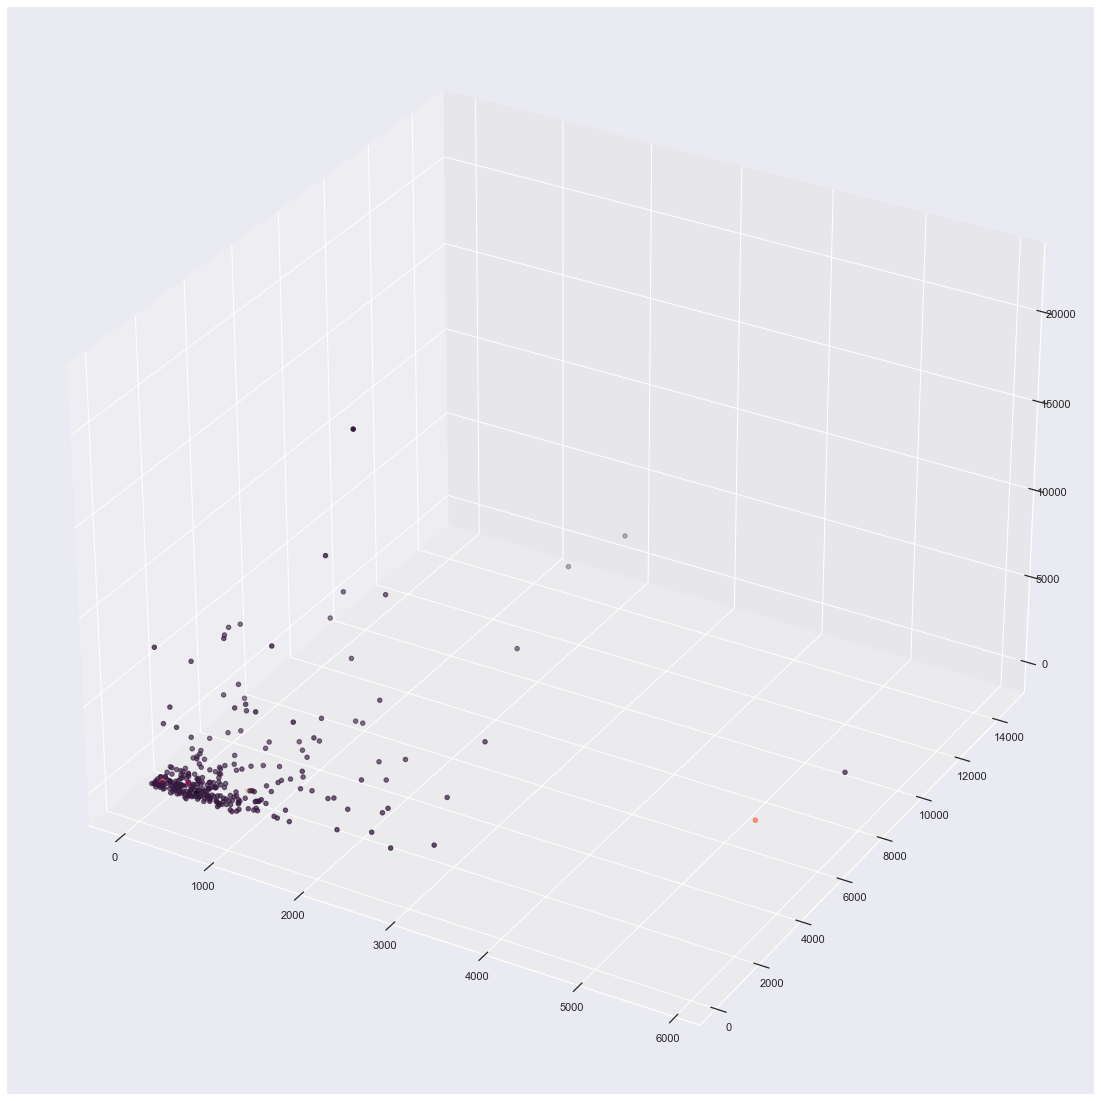

In [95]:
# <Testing> KMeans Clustering with Low concentration of  
a,b = k_means(data = deta2, samp = 'CL')

# Visualizing the above->

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')
a = pd.DataFrame(a)
ax.scatter(a.iloc[:,0],a.iloc[:,1],a.iloc[:,2],c = LabelEncoder().fit_transform(b)) 

plt.show() 


In [37]:
deta2 

{'CH':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A    PE-Cy5-A  \
 0       96.800003  995.0  1552.320068    2.970000   63.360001   70.290001   
 1      252.800003  707.0  1641.420044   87.120003   38.610001   59.400002   
 2      248.000000  791.0  1152.359985  -89.099998 -523.710022    1.980000   
 3      229.600006  827.0   708.840027   58.410000    1.980000   39.599998   
 4      289.600006  800.0  1036.530029   26.730000 -621.720032   53.459999   
 ...           ...    ...          ...         ...         ...         ...   
 99995  416.800018  892.0   414.809998  183.150009 -175.229996  -72.270004   
 99996  288.800018  831.0  1428.570068   51.480000  365.309998  -56.430000   
 99997  180.800003  716.0   356.399994  200.970001 -140.580002  109.889999   
 99998  494.399994  830.0   602.910034  100.980003 -141.570007    4.950000   
 99999  733.600037  800.0  3576.870117   91.080002  533.609985  215.820007   
 
         PE-Cy7-A        APC-A   APC-Cy7-A  Pacific Blue

In [120]:
# Combining the dataset of all samples to make final_df of shape - (11*1500, no_columns)
final_df = pd.DataFrame()
for key in deta2.keys():
  if key!='IND0' :
    v,lb = k_means_with_pca(data = deta2, samp = key)
    p = pd.DataFrame(v)
    p['labels'] = lb
    final_df = pd.concat([final_df,p], axis = 0)

labels = final_df['labels']
final_df.drop(['labels'], axis = 1)



,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,6110.842384,-1019.534986,-3366.262887,-1379.093402,2527.368512,-1195.304035,2659.644562,-12546.432480,3290.232461,3741.207193,...,2462.092783,13055.034382,4207.385914,1449.845519,-2467.348612,1914.266050,9230.690650,-5754.716997,-487.651888,-8946.693087
1,-3522.481329,-5083.863863,-4404.465552,-5322.998797,-16746.929045,-26369.621070,26873.768164,19810.263418,16966.020784,8701.932723,...,15282.681089,14205.451197,-17806.447182,15444.326355,7437.027132,1108.300654,-8992.534803,-1243.186357,-15165.725451,1742.119324
2,-3475.752456,-4172.885899,-2390.806546,-1570.823772,4175.935868,-3080.376855,-1913.956952,-4749.656049,-5221.960701,-5522.794840,...,-7765.331232,1596.833951,-3484.607031,-7288.873262,-8164.524488,-634.967704,-2685.438870,3080.417968,1699.140872,6519.963852
3,-1894.463008,-3373.229163,-3141.231092,-2205.232294,468.716578,-5676.838261,-6973.272094,-11017.610333,13772.723354,9416.173510,...,1918.836382,455.182801,1223.582762,-2176.728853,-1785.656565,-1553.006632,-8351.267469,4019.276987,-5785.617524,-11638.243760
4,6570.220510,-101.439057,-2596.273587,-2003.177078,6031.794116,-942.712414,1507.242474,5901.927184,-5499.188688,-4332.758333,...,-13350.205010,9075.717449,5467.794983,-8553.797928,7784.743432,-12258.150343,-8664.178946,-13506.497948,9117.111763,5874.360670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-4900.621427,2104.524982,-1277.018890,-1383.942481,1994.159985,5047.250567,-3188.006588,4644.168254,-1565.547061,5957.413321,...,-11726.269664,1856.725711,1723.428794,-1544.805228,3262.973656,3000.140013,1958.574983,-159.142755,-7253.023307,-512.724551
1496,8781.027983,-110.237542,7259.775463,16817.594513,3576.090166,-3336.238977,718.252082,-1598.077613,1823.366803,4501.971366,...,14495.802173,881.740472,2824.221309,-12177.114369,-8225.670116,-3176.975091,463.865003,6771.713002,-4181.281963,2951.959948
1497,-3395.241375,-2611.352747,-2055.339791,-4827.632779,17036.516799,2781.126916,-10664.207015,-12534.659830,3224.068921,-2169.756739,...,1994.940932,4254.988469,-4247.729540,-74.378150,-12857.138320,-5573.143927,282.919239,4955.964297,-6754.665475,-2913.092575
1498,982.568561,-1648.600846,1034.927093,-7247.770664,15264.575672,-5007.930882,-3939.154424,-8225.926973,-3090.568807,-4044.116886,...,6574.496503,4018.170717,331.782729,3062.803489,-1207.653545,-2173.668740,774.532124,-3774.629854,-3593.534282,5412.647692


In [121]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
0,6110.842384,-1019.534986,-3366.262887,-1379.093402,2527.368512,-1195.304035,2659.644562,-12546.432480,3290.232461,3741.207193,...,13055.034382,4207.385914,1449.845519,-2467.348612,1914.266050,9230.690650,-5754.716997,-487.651888,-8946.693087,CH-6
1,-3522.481329,-5083.863863,-4404.465552,-5322.998797,-16746.929045,-26369.621070,26873.768164,19810.263418,16966.020784,8701.932723,...,14205.451197,-17806.447182,15444.326355,7437.027132,1108.300654,-8992.534803,-1243.186357,-15165.725451,1742.119324,CH-6
2,-3475.752456,-4172.885899,-2390.806546,-1570.823772,4175.935868,-3080.376855,-1913.956952,-4749.656049,-5221.960701,-5522.794840,...,1596.833951,-3484.607031,-7288.873262,-8164.524488,-634.967704,-2685.438870,3080.417968,1699.140872,6519.963852,CH-4
3,-1894.463008,-3373.229163,-3141.231092,-2205.232294,468.716578,-5676.838261,-6973.272094,-11017.610333,13772.723354,9416.173510,...,455.182801,1223.582762,-2176.728853,-1785.656565,-1553.006632,-8351.267469,4019.276987,-5785.617524,-11638.243760,CH-6
4,6570.220510,-101.439057,-2596.273587,-2003.177078,6031.794116,-942.712414,1507.242474,5901.927184,-5499.188688,-4332.758333,...,9075.717449,5467.794983,-8553.797928,7784.743432,-12258.150343,-8664.178946,-13506.497948,9117.111763,5874.360670,CH-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-4900.621427,2104.524982,-1277.018890,-1383.942481,1994.159985,5047.250567,-3188.006588,4644.168254,-1565.547061,5957.413321,...,1856.725711,1723.428794,-1544.805228,3262.973656,3000.140013,1958.574983,-159.142755,-7253.023307,-512.724551,TM-3
1496,8781.027983,-110.237542,7259.775463,16817.594513,3576.090166,-3336.238977,718.252082,-1598.077613,1823.366803,4501.971366,...,881.740472,2824.221309,-12177.114369,-8225.670116,-3176.975091,463.865003,6771.713002,-4181.281963,2951.959948,TM-6
1497,-3395.241375,-2611.352747,-2055.339791,-4827.632779,17036.516799,2781.126916,-10664.207015,-12534.659830,3224.068921,-2169.756739,...,4254.988469,-4247.729540,-74.378150,-12857.138320,-5573.143927,282.919239,4955.964297,-6754.665475,-2913.092575,TM-6
1498,982.568561,-1648.600846,1034.927093,-7247.770664,15264.575672,-5007.930882,-3939.154424,-8225.926973,-3090.568807,-4044.116886,...,4018.170717,331.782729,3062.803489,-1207.653545,-2173.668740,774.532124,-3774.629854,-3593.534282,5412.647692,TM-3


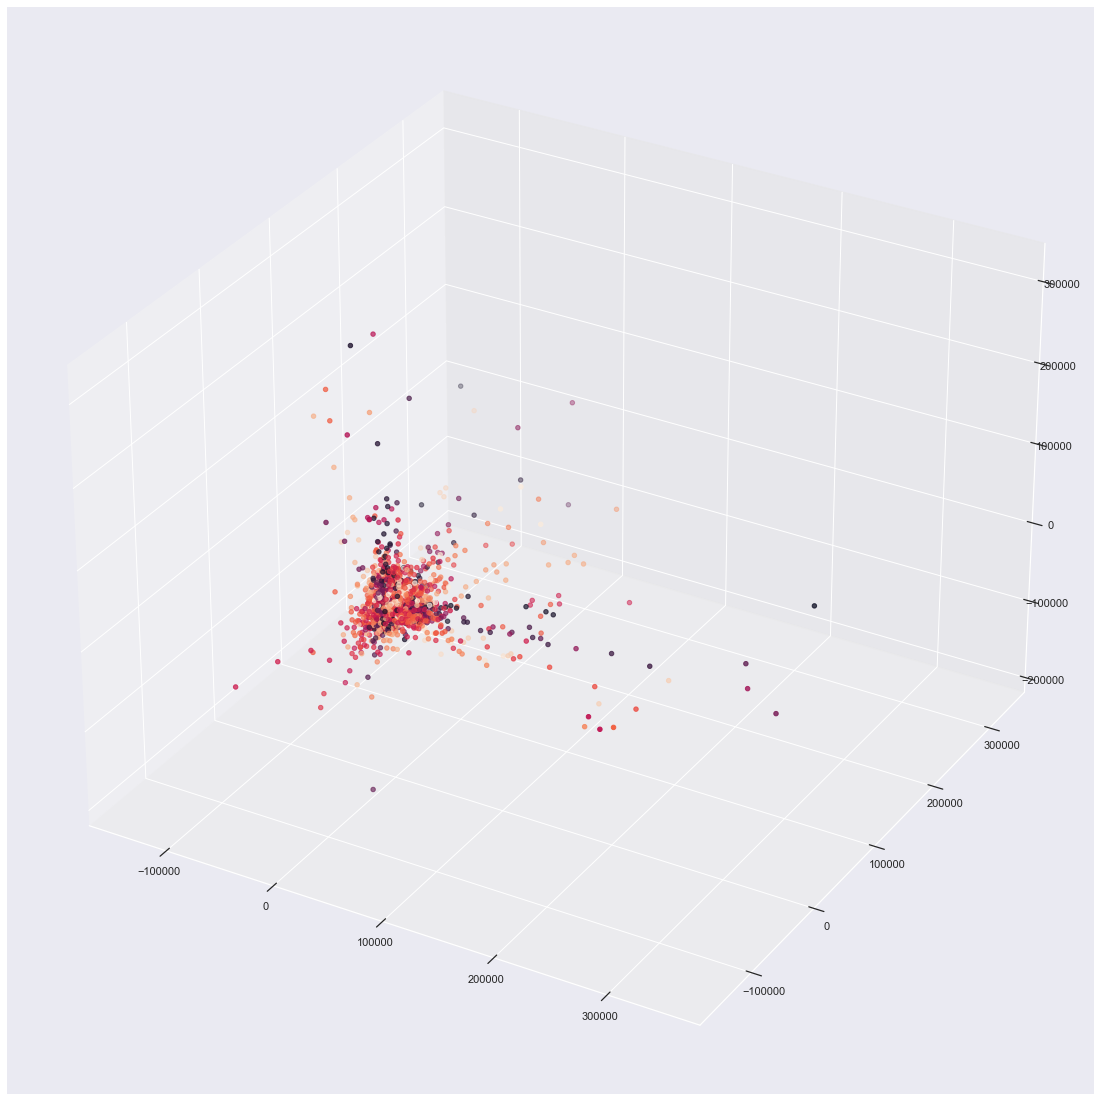

In [122]:
# Visualizing the above(used only when feature vector of length 3 was used)->

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df.iloc[:,0],final_df.iloc[:,1],final_df.iloc[:,2],c = LabelEncoder().fit_transform(labels)) 

plt.show() 

## Using Hierarchial Clustering



In [48]:
from sklearn.cluster import AgglomerativeClustering


model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(deta['CHD1'])

MemoryError: Unable to allocate 335. GiB for an array with shape (44999850000,) and data type float64

In [44]:
deta

{'CHD1':              FSC-A   FSC-H        SSC-A      FITC-A        PE-A     PE-Cy5-A  \
 0        96.800003   995.0  1552.320068    2.970000   63.360001    70.290001   
 1       252.800003   707.0  1641.420044   87.120003   38.610001    59.400002   
 2       248.000000   791.0  1152.359985  -89.099998 -523.710022     1.980000   
 3       229.600006   827.0   708.840027   58.410000    1.980000    39.599998   
 4       289.600006   800.0  1036.530029   26.730000 -621.720032    53.459999   
 ...            ...     ...          ...         ...         ...          ...   
 99995   453.600006   691.0  1041.479980  133.649994  -63.360001   -45.540001   
 99996   358.399994   816.0  1626.570068  -47.520000  146.520004  1256.310059   
 99997  2806.400146  2898.0  1939.410034   -4.950000  331.649994   -33.660000   
 99998   798.400024  1623.0  1729.530029 -180.180008 -955.350037    10.890000   
 99999   368.000000   738.0  1073.160034   76.230003 -200.970001   -13.860001   
 
          PE-Cy7-A

# Clustering via DBSCAN:

In [ ]:
# Vector Dataset Creation
pre_final_df = pd.DataFrame() 
for key in deta.keys():
  key = key[:-2]
  try:
    pre_final_df[key] = pd.concat([deta[key + 'D' + str(i)] for i in range(1,6)])
  except KeyError:
    pre_final

In [ ]:
final_df = final_df.iloc[:,:-1]

In [123]:
final_df


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
0,6110.842384,-1019.534986,-3366.262887,-1379.093402,2527.368512,-1195.304035,2659.644562,-12546.432480,3290.232461,3741.207193,...,13055.034382,4207.385914,1449.845519,-2467.348612,1914.266050,9230.690650,-5754.716997,-487.651888,-8946.693087,CH-6
1,-3522.481329,-5083.863863,-4404.465552,-5322.998797,-16746.929045,-26369.621070,26873.768164,19810.263418,16966.020784,8701.932723,...,14205.451197,-17806.447182,15444.326355,7437.027132,1108.300654,-8992.534803,-1243.186357,-15165.725451,1742.119324,CH-6
2,-3475.752456,-4172.885899,-2390.806546,-1570.823772,4175.935868,-3080.376855,-1913.956952,-4749.656049,-5221.960701,-5522.794840,...,1596.833951,-3484.607031,-7288.873262,-8164.524488,-634.967704,-2685.438870,3080.417968,1699.140872,6519.963852,CH-4
3,-1894.463008,-3373.229163,-3141.231092,-2205.232294,468.716578,-5676.838261,-6973.272094,-11017.610333,13772.723354,9416.173510,...,455.182801,1223.582762,-2176.728853,-1785.656565,-1553.006632,-8351.267469,4019.276987,-5785.617524,-11638.243760,CH-6
4,6570.220510,-101.439057,-2596.273587,-2003.177078,6031.794116,-942.712414,1507.242474,5901.927184,-5499.188688,-4332.758333,...,9075.717449,5467.794983,-8553.797928,7784.743432,-12258.150343,-8664.178946,-13506.497948,9117.111763,5874.360670,CH-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-4900.621427,2104.524982,-1277.018890,-1383.942481,1994.159985,5047.250567,-3188.006588,4644.168254,-1565.547061,5957.413321,...,1856.725711,1723.428794,-1544.805228,3262.973656,3000.140013,1958.574983,-159.142755,-7253.023307,-512.724551,TM-3
1496,8781.027983,-110.237542,7259.775463,16817.594513,3576.090166,-3336.238977,718.252082,-1598.077613,1823.366803,4501.971366,...,881.740472,2824.221309,-12177.114369,-8225.670116,-3176.975091,463.865003,6771.713002,-4181.281963,2951.959948,TM-6
1497,-3395.241375,-2611.352747,-2055.339791,-4827.632779,17036.516799,2781.126916,-10664.207015,-12534.659830,3224.068921,-2169.756739,...,4254.988469,-4247.729540,-74.378150,-12857.138320,-5573.143927,282.919239,4955.964297,-6754.665475,-2913.092575,TM-6
1498,982.568561,-1648.600846,1034.927093,-7247.770664,15264.575672,-5007.930882,-3939.154424,-8225.926973,-3090.568807,-4044.116886,...,4018.170717,331.782729,3062.803489,-1207.653545,-2173.668740,774.532124,-3774.629854,-3593.534282,5412.647692,TM-3


## Classification using different ML algorithms:

In [124]:
labels = final_df.iloc[:,-1]
final_df = final_df.drop(['labels'], axis = 1)



In [125]:

se = StandardScaler()
final_df = se.fit_transform(final_df)

In [126]:
final_df.shape

(16500, 100)

In [127]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [130]:
print(final_df.shape)
print(set(labels))

(16500, 100)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76}


In [137]:
# Using compressive encoding via autoencoder
# Training an autoencoder-->

# Scaling the data to make it suitable for the auto-encoder
X_scaled = MinMaxScaler().fit_transform(final_df)


# Building the Input Layer
input_layer = Input(shape =(final_df.shape[1], ))
  
# Building the Encoder network
encoded = Dense(100, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='relu')(encoded)
  
# Building the Decoder network
decoded = Dense(12, activation ='tanh')(encoded)
decoded = Dense(25, activation ='tanh')(decoded)
decoded = Dense(50, activation ='tanh')(decoded)
decoded = Dense(100, activation ='tanh')(decoded)
  
# Building the Output Layer
output_layer = Dense(final_df.shape[1], activation ='relu')(decoded)


# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adadelta", loss ="mse")
  
# Training the Auto-encoder network
autoencoder.fit(X_scaled, X_scaled, 
                batch_size = 16, epochs = 10, 
                shuffle = True, validation_split = 0.20)

hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])

Epoch 1/10
825/825 [==============================] - 3s 2ms/step - loss: 0.1567 - val_loss: 0.1450
Epoch 2/10
825/825 [==============================] - 2s 2ms/step - loss: 0.1337 - val_loss: 0.1241
Epoch 3/10
825/825 [==============================] - 2s 2ms/step - loss: 0.1160 - val_loss: 0.1094
Epoch 4/10
825/825 [==============================] - 2s 2ms/step - loss: 0.1031 - val_loss: 0.0983
Epoch 5/10
825/825 [==============================] - 2s 2ms/step - loss: 0.0940 - val_loss: 0.0911
Epoch 6/10
825/825 [==============================] - 2s 2ms/step - loss: 0.0884 - val_loss: 0.0868
Epoch 7/10
825/825 [==============================] - 2s 2ms/step - loss: 0.0849 - val_loss: 0.0841
Epoch 8/10
825/825 [==============================] - 2s 2ms/step - loss: 0.0828 - val_loss: 0.0825
Epoch 9/10
825/825 [==============================] - 2s 2ms/step - loss: 0.0815 - val_loss: 0.0815
Epoch 10/10
825/825 [==============================] - 2s 2ms/step - loss: 0.0807 - val_loss: 0.0808

In [139]:
# Autoencoder P2 -->

final_df = hidden_representation.predict(X_scaled)

516/516 [==============================] - 1s 875us/step


In [140]:
final_df

array([[-0.05057386,  0.70546526,  0.4717596 , ..., -0.5412113 ,
        -0.44630507,  0.86211383],
       [ 0.05081545,  0.70257443,  0.44101545, ..., -0.62394506,
        -0.3952314 ,  0.8946018 ],
       [-0.03810772,  0.6769634 ,  0.5348599 , ..., -0.5183734 ,
        -0.4212776 ,  0.8275243 ],
       ...,
       [-0.03057418,  0.69563323,  0.49732915, ..., -0.5346057 ,
        -0.46065843,  0.86639726],
       [-0.05255631,  0.7169135 ,  0.5294302 , ..., -0.53417754,
        -0.450874  ,  0.8701344 ],
       [-0.01537817,  0.71921563,  0.47633153, ..., -0.52981   ,
        -0.45182133,  0.885187  ]], dtype=float32)

In [34]:
# Using Logistic Regression for Multi-Class Classification ->

# When logistic regression is used for multi-class classification, it basically uses binary classification multiple times with a multinomial probability distribution as it is not made for multi-class classification
# So called One vs Rest approach is used in such classification

from statistics import mean, stdev
def logistic_regression(x, y):
  # defined the multinomial logistic regression model
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model and collect the scores
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # report the model performance
  # print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))
  return n_scores


In [2]:
# Lasso Regression

def lasso(X_train, Y_train):
    lasso_model = Lasso(alpha=1.0)
    lasso=lasso_model.fit(X_train , Y_train)
    lasso_predict = lasso.predict(X_test)
    Lasso_MAPE = MAPE(Y_test,lasso_predict)
    print("MAPE value: ",Lasso_MAPE)
    Accuracy = 100 - Lasso_MAPE
    print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

In [86]:
# Defining XGBoostClassifier
yuse autoencoder also
le = LabelEncoder()
labels = le.fit_transform(labels)

help(le)

Help on LabelEncoder in module sklearn.preprocessing._label object:

class LabelEncoder(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Encode target labels with value between 0 and n_classes-1.
 |  
 |  This transformer should be used to encode target values, *i.e.* `y`, and
 |  not the input `X`.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  .. versionadded:: 0.12
 |  
 |  Attributes
 |  ----------
 |  classes_ : ndarray of shape (n_classes,)
 |      Holds the label for each class.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn import preprocessing
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >>> le.transform([1, 1, 2, 6])
 |  array([0, 0, 1, 2]...)
 |  >>> le.inverse_transform([0, 0, 1, 2])
 |  array([1, 1, 2, 6])
 |  
 |  It can also be used to transform non-numerical labels (as long as

In [84]:
# Using SVM -->
x_train, x_test, y_train, y_test = train_test_split(vectors, labels, 
                                                    train_size = 0.75,
                                                    test_size = 0.25,
                                                    random_state = 101)
print(y_train)
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

# Polynomial Kernel Acurracy 
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

# RBF kernel accuracy
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))



ValueError: Found input variables with inconsistent numbers of samples: [300, 1500]

In [92]:
print('Accuracy is just',accuracy_score(poly_pred, y_test)*100, '%')

Accuracy is just 21.89090909090909 %


Cluster 1 Inertia 5941904801792.0
Cluster 2 Inertia 2808819744768.0
Cluster 3 Inertia 2039928193024.0
Cluster 4 Inertia 1468110077952.0
Cluster 5 Inertia 1237317058560.0
Cluster 6 Inertia 1040749166592.0
Cluster 7 Inertia 908996378624.0
Cluster 8 Inertia 808406155264.0
Cluster 9 Inertia 714666868736.0
Cluster 10 Inertia 634819248128.0
Cluster 11 Inertia 589482688512.0
Cluster 12 Inertia 545928806400.0
Cluster 13 Inertia 512753434624.0
Cluster 14 Inertia 480685359104.0
Cluster 15 Inertia 451013836800.0
Cluster 16 Inertia 424989818880.0
Cluster 17 Inertia 400969269248.0
Cluster 18 Inertia 384181370880.0
Cluster 19 Inertia 370119966720.0


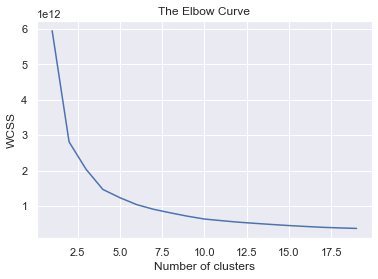

In [93]:
# Plotting an Elbow curve for the same

def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_)
    plt.plot(range(1,20),wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

In [ ]:
# Shuffling and importing vectors containing 1000 data points
data = data.sample(n = 1000)

In [ ]:
# Unsupervised ML Model -- Extracts features on its own

In [ ]:
# Naive Bayes Model

In [ ]:
# RandomForestClassifier
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.25, 
                                                        random_state = 101)
    start_time = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start_time)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

forest_test(final_df, labels)

NameError: ignored

In [ ]:
#SVR Model

def svr(x,y,parameters):
        print ('Running SVR model')
        models=[]
        test_accs=[]
        test_f1s=[]
        for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
            print ('\n\nNew Outer CV\n\n')
            grid = GridSearchCV(SVR(), param_grid=parameters, verbose=100,
                            n_jobs=4, scoring=['neg_mean_squared_error'],refit='neg_mean_squared_error')
            grid.fit(x[tr_index], y[tr_index])
            best_model = grid.best_estimator_
            best_model_preds = best_model.predict(x[ts_index])
            test_acc = mean_squared_error(y[ts_index],best_model_preds)
            models.append(best_model)
            test_accs.append(test_acc)
        best_test_acc = min(test_accs)
        best_test_model = models[test_accs.index(best_test_acc)]
        print ("\n\n Nested CV Results: {0} {1}\n\n".format(np.mean(test_accs), np.std(test_accs)))
        return best_test_model
svr()

In [ ]:
# Gaussian Process
def GaussianProcess(x,y,parameters=None):
		cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
		scores=cross_val_score(GaussianProcessClassifier(1.0 * RBF(1.0)), x, y, cv=cv, n_jobs=5, verbose=100)
		model=GaussianProcessClassifier(1.0 * RBF(1.0)).fit(x,y)
		return model


In [ ]:
# Naive Bayes Model
def naiveBayes(x,y,parameters=None):
	cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
	scores=cross_val_score(GaussianNB(), x, y, cv=cv, n_jobs=4, verbose=100,
				scoring='accuracy')
	model=GaussianNB().fit(x,y)
	return model

In [ ]:
def svm(x,y,parameters):
	print ("Running SVM model")
	#C_range = np.logspace(-2, 10, 13)
	#gamma_range = np.logspace(-9, 3, 13)
	#param_grid = dict(gamma=gamma_range, C=C_range)
	models=[]
	test_accs=[]
	test_f1s=[]
	for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
		print ("\n\nNew Outer CV\n\n")	
	#outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
		grid = GridSearchCV(SVC(probability=True), param_grid=parameters, verbose=100, 
				n_jobs=4, scoring=['f1_weighted','accuracy'],refit='f1_weighted')
		grid.fit(x[tr_index], y[tr_index])
		best_model = grid.best_estimator_
		best_model_preds = best_model.predict(x[ts_index])
		test_acc = accuracy_score(y[ts_index],best_model_preds)
		test_f1 = f1_score(y[ts_index], best_model_preds, average="weighted")	
		models.append(best_model)
		test_accs.append(test_acc)
		test_f1s.append(test_f1)	
	#non_nested_score=grid.best_score_
	#nested_score = cross_val_score(grid, X=x, y=y, cv=outer_cv)
	#print "Non-nested - Nested: " + str(non_nested_score - nested_score.mean())
	best_test_acc = max(test_accs)
	best_test_model = models[test_accs.index(best_test_acc)]
	print (f'\n\n Nested CV Results: {0} {1} {2} {3}\n\n').format(np.mean(test_accs), np.std(test_accs), np.mean(test_f1s), np.std(test_f1s))
	return best_test_model

In [ ]:
svm(ar,labels, {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']})

## Getting methane production data:

In [30]:
file = pd.read_excel('./Biogas_Methane_Inhibition_Data.xlsx')

pandas.core.frame.DataFrame

In [4]:
import numpy as np
x = np.random.rand(4, 5)

y = np.sum(x, axis=1)
x

array([[0.86436334, 0.11273427, 0.14946477, 0.38254975, 0.07213117],
       [0.37283565, 0.87685185, 0.68087709, 0.46499722, 0.73249256],
       [0.81413205, 0.54298438, 0.93001278, 0.85291312, 0.33267939],
       [0.59374171, 0.01651851, 0.09357982, 0.74233869, 0.4070993 ]])

In [3]:
y.shape

(4,)